In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse

from scipy.stats import shapiro
import matplotlib
#matplotlib.rc('axes', unicode_minus = False)
matplotlib.rc('font', family = 'Malgun Gothic')

In [3]:
df = pd.read_csv("new_card_spending.csv", parse_dates = ["사용일자"])
df_card = pd.read_csv("C:\\Users\\eoeo7\\Desktop\\팀 프로젝트/Card_Data_1.csv", encoding='utf-8')
df_card = df_card.rename(columns={'Card_ID' : '사용카드'})
df = pd.merge(df,df_card, on='사용카드')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\eoeo7\\Desktop\\팀 프로젝트/Card_Data_1.csv'

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187321 entries, 0 to 187320
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    187321 non-null  datetime64[ns]
 1   지역      187321 non-null  object        
 2   소비처     187321 non-null  object        
 3   주소      187321 non-null  object        
 4   소비처업종   187321 non-null  object        
 5   성별      187321 non-null  object        
 6   연령      187321 non-null  int64         
 7   사용횟수    187321 non-null  int64         
 8   사용금액    187321 non-null  int64         
 9   사용카드    187321 non-null  int64         
 10  연령대     187321 non-null  object        
 11  요일      187321 non-null  object        
 12  분류      187321 non-null  object        
 13  혜택분야    187321 non-null  object        
 14  소개      187321 non-null  object        
 15  연회비     187321 non-null  object        
 16  옵션      185874 non-null  object        
 17  카드명     187321 non-null  obje

In [146]:
df.drop(['소개', '옵션', '카드명', '연령', '사용일자'], axis=1, inplace=True)

In [147]:
df.head()

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비
0,노원구,상계2동,노원구 상계2동,자동차정비,여성,3,56,82,40대,일,체크카드,public,없음
1,종로구,창신3동,종로구 창신3동,의료기관,남성,38,129,82,40대,토,체크카드,public,없음
2,종로구,혜화동,종로구 혜화동,자동차정비,여성,2,57,82,60대,화,체크카드,public,없음
3,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,3,53,82,30대,수,체크카드,public,없음
4,노원구,상계8동,노원구 상계8동,서적문구,여성,29,6,82,70대,금,체크카드,public,없음


In [148]:
df['혜택분야'].value_counts()

shopping          34342
life              26361
comm              25407
food              23556
oil               18280
culture           15936
onlineShopping    15293
travel            13253
public            11555
finance            3338
Name: 혜택분야, dtype: int64

In [149]:
df.isnull().sum()

지역       0
소비처      0
주소       0
소비처업종    0
성별       0
사용횟수     0
사용금액     0
사용카드     0
연령대      0
요일       0
분류       0
혜택분야     0
연회비      0
dtype: int64

In [150]:
# df = df.dropna().reset_index()

In [151]:
# train, test를 분할하기 위한 함수
from sklearn.model_selection import train_test_split, GridSearchCV

# confusion matrix
from sklearn.metrics import confusion_matrix
import os
# sklearn.tree 의 DecisionTreeClassifier: 분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# sklearn.tree의 export_graphviz: graphviz 패키지가 사용할 수 있는 .dot 확장자 파일로 저장
from sklearn.tree import export_graphviz

# 만약 그래프비즈가 안되면...
from sklearn.tree import plot_tree
# 명목형 변수 목록

In [152]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN

In [153]:
# obj_cols = df.select_dtypes("object").columns
# num_cols = df.select_dtypes(exclude="object").columns

In [154]:
df.head()

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비
0,노원구,상계2동,노원구 상계2동,자동차정비,여성,3,56,82,40대,일,체크카드,public,없음
1,종로구,창신3동,종로구 창신3동,의료기관,남성,38,129,82,40대,토,체크카드,public,없음
2,종로구,혜화동,종로구 혜화동,자동차정비,여성,2,57,82,60대,화,체크카드,public,없음
3,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,3,53,82,30대,수,체크카드,public,없음
4,노원구,상계8동,노원구 상계8동,서적문구,여성,29,6,82,70대,금,체크카드,public,없음


In [155]:
df_raw = res[['사용횟수', '사용금액']]
#df_dummy = pd.get_dummies(df_raw)

In [156]:
df_raw.head()

,사용횟수,사용금액
5496,2,51
5497,52,223
5498,44,120
5499,2,56
5500,16,118


In [157]:
scaler = StandardScaler()
df_raw_x = scaler.fit_transform(df_raw)
df_raw_x[:5]

array([[-0.36539132, -0.24416895],
       [-0.19288499, -0.22039271],
       [-0.220486  , -0.23463081],
       [-0.36539132, -0.24347778],
       [-0.31708955, -0.23490727]])

In [158]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error" : clus_error})
ds_error

,NumberofCluster,Error
0,1,118016.000000
1,2,49270.503477
2,3,30113.337144
3,4,21649.494576
4,5,17586.653256
5,6,14636.387762
6,7,12510.472739
7,8,10929.525103
8,9,9578.804466
9,10,8467.650463


Text(0, 0.5, 'Sum of squared distance')

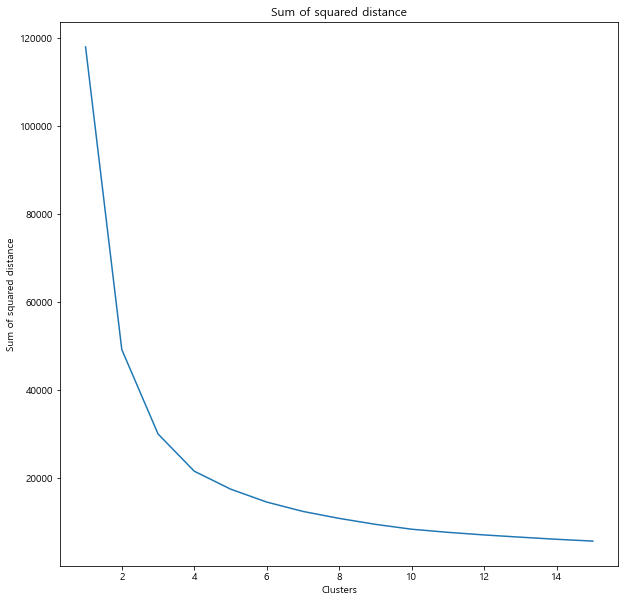

In [159]:
plt.figure(figsize = (10, 10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

### 군집 4개

In [160]:
clus = KMeans(4)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans
df_raw.head(10)

<ipython-input-160-d45c14d9912c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw["ClusterKmeans"] = cluster_kmeans


,사용횟수,사용금액,ClusterKmeans
5496,2,51,1
5497,52,223,1
5498,44,120,1
5499,2,56,1
5500,16,118,1
5501,96,471,1
5502,4,57,1
5503,40,103,1
5504,63,74,1
5505,45,74,1


In [161]:
ds_summary_km = df_raw.groupby("ClusterKmeans").agg(["mean"])
levels0 = ds_summary_km.columns.get_level_values(0)
levels1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = levels0 + "_" + levels1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,사용횟수_mean,사용금액_mean
0,1,44.765,517.316
1,2,2698.870,86781.360
2,3,568.493,8970.784
3,4,1508.359,33761.378


In [162]:
df.head()

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비
0,노원구,상계2동,노원구 상계2동,자동차정비,여성,3,56,82,40대,일,체크카드,public,없음
1,종로구,창신3동,종로구 창신3동,의료기관,남성,38,129,82,40대,토,체크카드,public,없음
2,종로구,혜화동,종로구 혜화동,자동차정비,여성,2,57,82,60대,화,체크카드,public,없음
3,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,3,53,82,30대,수,체크카드,public,없음
4,노원구,상계8동,노원구 상계8동,서적문구,여성,29,6,82,70대,금,체크카드,public,없음


In [166]:
df_raw1 = df_raw[["ClusterKmeans"]]
result = pd.concat([res, df_raw1], axis=1)

<AxesSubplot:xlabel='성별', ylabel='count'>

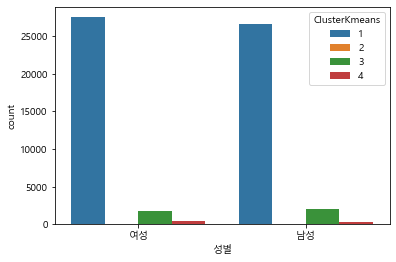

In [167]:
sns.countplot(data = result, x = "성별", hue = "ClusterKmeans")

<AxesSubplot:xlabel='지역', ylabel='count'>

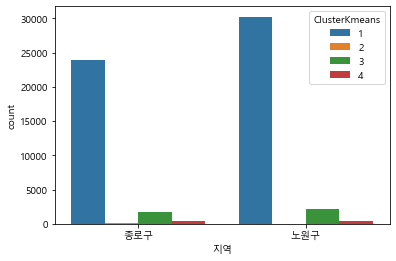

In [168]:
sns.countplot(data = result, x = "지역", hue = "ClusterKmeans")

In [169]:
c1 = result['ClusterKmeans']==1

In [170]:
result2 = result.loc[~c1] 

In [171]:
result2.T.duplicated()

지역               False
소비처              False
주소               False
소비처업종            False
성별               False
사용횟수             False
사용금액             False
사용카드             False
연령대              False
요일               False
분류               False
혜택분야             False
연회비              False
ClusterKmeans    False
dtype: bool

In [172]:
result2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 5608 to 182203
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   지역             4829 non-null   object
 1   소비처            4829 non-null   object
 2   주소             4829 non-null   object
 3   소비처업종          4829 non-null   object
 4   성별             4829 non-null   object
 5   사용횟수           4829 non-null   int64 
 6   사용금액           4829 non-null   int64 
 7   사용카드           4829 non-null   int64 
 8   연령대            4829 non-null   object
 9   요일             4829 non-null   object
 10  분류             4829 non-null   object
 11  혜택분야           4829 non-null   object
 12  연회비            4829 non-null   object
 13  ClusterKmeans  4829 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 725.9+ KB


<AxesSubplot:xlabel='연회비', ylabel='count'>

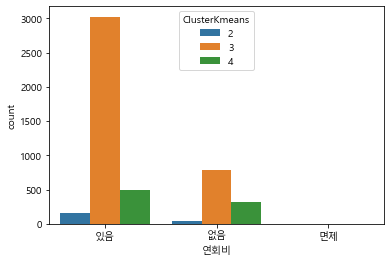

In [173]:
sns.countplot(data = result2, x = "연회비", hue = "ClusterKmeans")

In [175]:
result[result['ClusterKmeans']==3] # 1: 174731, 2: 463, 3: 1965, 4: 10159

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비,ClusterKmeans
5608,종로구,사직동,종로구 사직동,자동차정비,남성,379,3048,178,30대,화,신용카드,oil,있음,3
5884,노원구,공릉2동,노원구 공릉2동,연료판매,남성,271,11669,178,50대,일,신용카드,oil,있음,3
9400,노원구,공릉1동,노원구 공릉1동,유통업,여성,745,4704,214,20대,일,신용카드,comm,있음,3
9414,종로구,사직동,종로구 사직동,유통업,남성,1113,18779,214,30대,화,신용카드,comm,있음,3
9418,노원구,"중계2,3동","노원구 중계2,3동",유통업,여성,894,4231,214,20대,화,신용카드,comm,있음,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182038,종로구,"종로5,6가동","종로구 종로5,6가동",연료판매,남성,257,9228,186,50대,수,신용카드,oil,있음,3
182045,종로구,사직동,종로구 사직동,자동차정비,남성,563,3748,186,30대,토,신용카드,oil,있음,3
182077,노원구,공릉1동,노원구 공릉1동,연료판매,남성,186,9626,186,50대,월,신용카드,oil,있음,3
182106,종로구,사직동,종로구 사직동,자동차정비,남성,403,2909,186,30대,수,신용카드,oil,있음,3


In [176]:
res = result[['ClusterKmeans', '지역', '소비처업종', '성별', '연령대','연회비', '분류']]
res.head()

,ClusterKmeans,지역,소비처업종,성별,연령대,연회비,분류
5496,1,종로구,요식업소,여성,40대,있음,신용카드
5497,1,종로구,자동차정비,남성,40대,있음,신용카드
5498,1,노원구,자동차정비,여성,30대,있음,신용카드
5499,1,노원구,레저업소,남성,50대,있음,신용카드
5500,1,노원구,연료판매,여성,40대,있음,신용카드


In [177]:
res.isnull().sum()

ClusterKmeans    0
지역               0
소비처업종            0
성별               0
연령대              0
연회비              0
분류               0
dtype: int64

In [178]:
p1 = pd.pivot_table(data = df, index = ["사용카드", "혜택분야"], values = "사용횟수", aggfunc = 'sum').reset_index()
result = pd.DataFrame()

for i in p1["혜택분야"].unique():
    p2 = p1[p1["혜택분야"]==i].sort_values(by = "사용횟수", ascending=False).head(5)
    result = pd.concat([p2, result], axis=0)
result
order_list = result['사용카드'].to_list()
isin = df['사용카드'].isin(order_list)

res = df.loc[isin]


In [179]:
res

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비
5496,종로구,혜화동,종로구 혜화동,요식업소,여성,2,51,178,40대,일,신용카드,oil,있음
5497,종로구,창신3동,종로구 창신3동,자동차정비,남성,52,223,178,40대,일,신용카드,oil,있음
5498,노원구,"상계6,7동","노원구 상계6,7동",자동차정비,여성,44,120,178,30대,일,신용카드,oil,있음
5499,노원구,"상계6,7동","노원구 상계6,7동",레저업소,남성,2,56,178,50대,월,신용카드,oil,있음
5500,노원구,공릉2동,노원구 공릉2동,연료판매,여성,16,118,178,40대,월,신용카드,oil,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182478,노원구,공릉2동,노원구 공릉2동,자동차정비,남성,9,14,186,40대,화,신용카드,oil,있음
182479,노원구,중계4동,노원구 중계4동,서적문구,여성,24,160,186,60대,수,신용카드,oil,있음
182480,종로구,혜화동,종로구 혜화동,신변잡화,여성,38,119,186,30대,수,신용카드,oil,있음
182481,노원구,중계본동,노원구 중계본동,연료판매,남성,36,1396,186,50대,수,신용카드,oil,있음


In [4]:
data2 = pd.read_csv('data2.csv')
data2.head()

,지역,소비처,주소,소비처업종,성별,사용횟수,사용금액,사용카드,연령대,요일,분류,혜택분야,연회비,Most Likely Cluster Formula
0,노원구,상계2동,노원구 상계2동,자동차정비,여성,3,56,82,40대,일,체크카드,public,없음,Cluster 2
1,종로구,창신3동,종로구 창신3동,의료기관,남성,38,129,82,40대,토,체크카드,public,없음,Cluster 2
2,종로구,혜화동,종로구 혜화동,자동차정비,여성,2,57,82,60대,화,체크카드,public,없음,Cluster 2
3,종로구,"종로5,6가동","종로구 종로5,6가동",음료식품,여성,3,53,82,30대,수,체크카드,public,없음,Cluster 2
4,노원구,상계8동,노원구 상계8동,서적문구,여성,29,6,82,70대,금,체크카드,public,없음,Cluster 2


<AxesSubplot:xlabel='소비처업종', ylabel='count'>

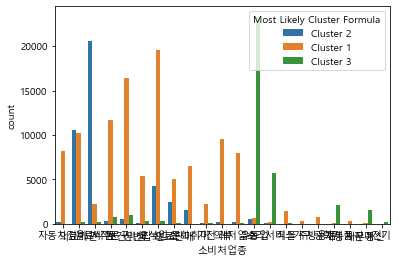

In [184]:
sns.countplot(data = data2, x = "소비처업종", hue = "Most Likely Cluster Formula")

In [5]:
c1 = data2["Most Likely Cluster Formula"]=='Cluster 1'
c2 = data2["Most Likely Cluster Formula"]=='Cluster 2'
c3 = data2["Most Likely Cluster Formula"]=='Cluster 3'
result1 = data2.loc[c1]
result2 = data2.loc[c2]
result3 = data2.loc[c3]
# result1[result1['소비처업종']=='요식업소']['사용금액'].()
result1[result1["소비처업종"]=='레저업소'].shape

(7940, 14)

<AxesSubplot:xlabel='연회비', ylabel='count'>

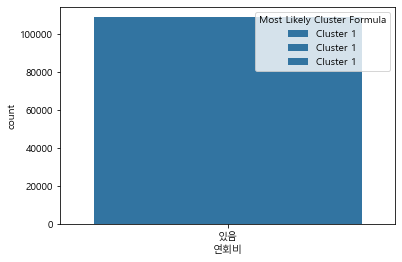

In [6]:
sns.countplot(data = result1, x = "소비처업종", hue = "Most Likely Cluster Formula")
sns.countplot(data = result1, x = "혜택분야", hue = "Most Likely Cluster Formula")
sns.countplot(data = result1, x = "연회비", hue = "Most Likely Cluster Formula")

<AxesSubplot:xlabel='연회비', ylabel='count'>

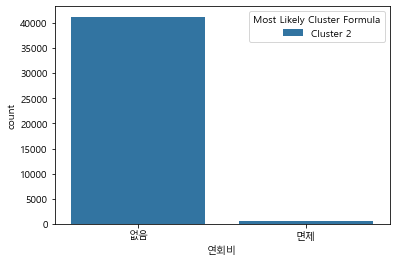

In [7]:
# sns.countplot(data = result2, x = "소비처업종", hue = "Most Likely Cluster Formula")
# sns.countplot(data = result2, x = "혜택분야", hue = "Most Likely Cluster Formula")
sns.countplot(data = result2, x = "연회비", hue = "Most Likely Cluster Formula")

<AxesSubplot:xlabel='연회비', ylabel='count'>

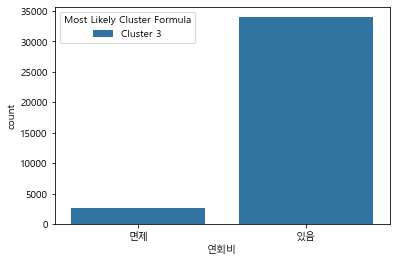

In [8]:
# sns.countplot(data = result3, x = "소비처업종", hue = "Most Likely Cluster Formula")
# sns.countplot(data = result3, x = "혜택분야", hue = "Most Likely Cluster Formula")
sns.countplot(data = result3, x = "연회비", hue = "Most Likely Cluster Formula")

In [ ]:
data2[data2["카드"]]

## 의사결정나무

In [118]:
from 
from sklearn.tree import DecisionTreeClassifier

In [122]:
result = result[['지역','소비처업종','연령대','성별','ClusterKmeans']]

In [123]:
# drop: X변수외 변수 삭제
df_raw_x = result.drop(["ClusterKmeans"], axis = 1, inplace = False)

# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_raw_dummy = pd.get_dummies(df_raw_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,지역_노원구,지역_종로구,소비처업종_가구,소비처업종_가전,소비처업종_광학제품,소비처업종_레저업소,소비처업종_문화취미,소비처업종_보건위생,소비처업종_사무통신,소비처업종_서적문구,...,연령대_20대,연령대_30대,연령대_40대,연령대_50대,연령대_60대,연령대_70대,연령대_80대,연령대_90대,성별_남성,성별_여성
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [124]:
df_raw_y = df_raw["ClusterKmeans"] 
df_x_dummy = pd.get_dummies(df_raw_x)

In [125]:
# train_test_split(X: 설명변수 데이터, Y: 목표변수 데이터, test_size = test 데이터 비율, random_state: 랜덤)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, # 설명변수 데이터
                                                                df_raw_y, # 목표변수 데이터
                                                                test_size = 0.3, # test 데이터의 비율
                                                                random_state = 1234)  # random state

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (131124, 34)
train data Y size : (131124,)
test data X size : (56197, 34)
test data Y size : (56197,)


In [126]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# 훈련 데이터 정확도
print("Accucary on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 정확도
print("Accucary on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accucary on training set: 0.933
Accucary on test set: 0.933


In [ ]:
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 20)]
para_depth = [depth for depth in range(1, 11)]

# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeClassifier()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["auto", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

## 로지스틱... 회귀분석....

In [9]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# 로지스틱 분석 패키지
from statsmodels.api import Logit

# 평가 함수
from sklearn.metrics import accuracy_score

# confusion matrix
from sklearn.metrics import confusion_matrix

In [11]:
result = data2[['지역','연령대','성별','Most Likely Cluster Formula','분류']]
result

,지역,연령대,성별,Most Likely Cluster Formula,분류
0,노원구,40대,여성,Cluster 2,체크카드
1,종로구,40대,남성,Cluster 2,체크카드
2,종로구,60대,여성,Cluster 2,체크카드
3,종로구,30대,여성,Cluster 2,체크카드
4,노원구,70대,여성,Cluster 2,체크카드
...,...,...,...,...,...
187313,종로구,20대,남성,Cluster 2,체크카드
187314,노원구,20대,남성,Cluster 2,체크카드
187315,노원구,30대,남성,Cluster 2,체크카드
187316,종로구,20대,남성,Cluster 2,체크카드


In [15]:
result.rename(columns={'Most Likely Cluster Formula':'cluster'})

,지역,연령대,성별,cluster,분류
0,노원구,40대,여성,Cluster 2,체크카드
1,종로구,40대,남성,Cluster 2,체크카드
2,종로구,60대,여성,Cluster 2,체크카드
3,종로구,30대,여성,Cluster 2,체크카드
4,노원구,70대,여성,Cluster 2,체크카드
...,...,...,...,...,...
187313,종로구,20대,남성,Cluster 2,체크카드
187314,노원구,20대,남성,Cluster 2,체크카드
187315,노원구,30대,남성,Cluster 2,체크카드
187316,종로구,20대,남성,Cluster 2,체크카드


In [17]:
result['cluster']= np.where(result['cluster'] == 'Cluster 2', 2, np.where(result['cluster'] == 'Cluster 1', 1, np.where(result['cluster'] == 'Cluster 3', 3, 4)))

KeyError: 'cluster'

In [12]:
df_train, df_test = train_test_split(result, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (131122, 5)
test data size : (56196, 5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit()

In [13]:
# from_formula 함수를 이용하여 변수 역할 지정
# 분석 대상 이벤트 = “1”
log_model = Logit.from_formula("""Most Likely Cluster Formula ~ C(지역) + C(성별) + C(연령대) + C(분류)""", df_train)

# 적합
log_result = log_model.fit()

# 결과 출력
print(log_result.summary())

SyntaxError: invalid syntax (<unknown>, line 1)